In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Load the data 
df_student_performance = pd.read_csv('Student_performance_data _.csv')

In [59]:
df_student_performance.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


<Axes: xlabel='GPA', ylabel='Count'>

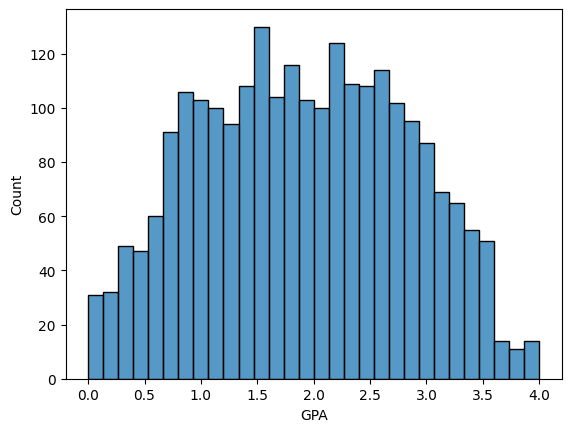

In [60]:
# histogra de la columna GPA
sns.histplot(df_student_performance['GPA'], bins=30)

In [61]:
df_student_performance.shape    

df_student_performance_respaldo= df_student_performance.copy()

In [62]:
# borrar columna GradeClass
df_student_performance.drop('GradeClass', axis=1, inplace=True)

In [63]:
# crear dataset de entrenamiento y test donde la variable dependiente es GPA y StudentID
X = df_student_performance.drop(['GPA', 'StudentID'], axis=1)
y = df_student_performance['GPA']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [64]:
# hacer un modelo random forest regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluar el modelo con accuracy score

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(mse)

# imprimir precision del modelo 
print(model.score(X_test, y_test))

# imprimir las caracteristicas mas importantes
importances = model.feature_importances_

0.05835644123690864
0.9283431595219873


In [65]:
importances

array([0.00664637, 0.00243426, 0.00542755, 0.0062592 , 0.06034612,
       0.85250842, 0.01414782, 0.03164123, 0.00760149, 0.00691577,
       0.00391227, 0.00215949])

In [66]:
# crear un modelo de regresion lineal 
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(mse)

print(model.score(X_test, y_test))

# imprimir los coeficientes
model.coef_



0.03820486272340606
0.9530876164545139


array([-6.19529123e-03,  1.22373337e-02,  2.49259697e-03,  8.87234024e-05,
        2.93401037e-02, -9.96384765e-02,  2.60567742e-01,  1.48145671e-01,
        1.91075683e-01,  1.79381859e-01,  1.50739166e-01, -1.82298903e-03])

In [67]:
# hacer un modelo de regresion polinomial
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# grafitar el modelo de regresion polinomial
model = LinearRegression()

model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)

print(mse)

print(model.score(X_test_poly, y_test))

# imprimir los coeficientes

0.039490326004917954
0.9515091748060642


Epoch 1/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.6637 - mean_squared_error: 12.6637 - val_loss: 2.2766 - val_mean_squared_error: 2.2766
Epoch 2/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 2.0199 - mean_squared_error: 2.0199 - val_loss: 1.4337 - val_mean_squared_error: 1.4337
Epoch 3/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 1.2328 - mean_squared_error: 1.2328 - val_loss: 0.9803 - val_mean_squared_error: 0.9803
Epoch 4/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9117 - mean_squared_error: 0.9117 - val_loss: 0.6503 - val_mean_squared_error: 0.6503
Epoch 5/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5338 - mean_squared_error: 0.5338 - val_loss: 0.3342 - val_mean_squared_error: 0.3342
Epoch 6/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.2641 - mean_squared_error: 0.2641 - val_loss: 0.1893 - val_mean_squared_error: 0.1893
Epoch 7/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1758 - mean_squared_error: 0.1758 - val_loss: 0.1

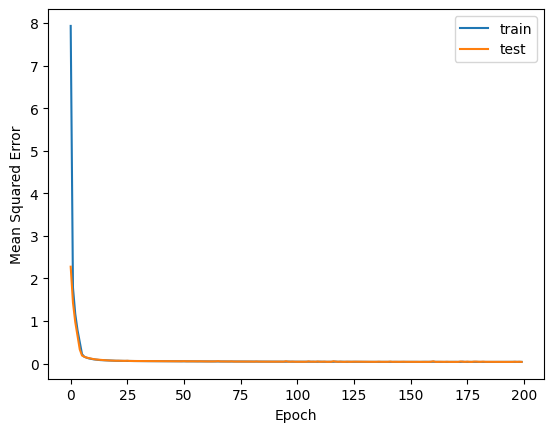

In [71]:
# hacer um modelo red neuronal con keras 

from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

model = Sequential()

model.add(Input(shape=(12,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # Cambiar a 'linear' para regresión

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Guardar el historial de entrenamiento
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))  # Ajustar epochs y batch_size

y_pred = model.predict(X_test)

# evaluar el modelo con mean_squared_error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

# imprimir score del modelo
print(mse)

# imprimir precision del modelo
print(model.evaluate(X_test, y_test))

# Graficar la curva de entrenamiento
plt.plot(history.history['mean_squared_error'], label='train')
plt.plot(history.history['val_mean_squared_error'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [69]:
# imprimir acuracy del modelo 
print(model.evaluate(X_test, y_test))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 0.0419 - mean_squared_error: 0.0419
[0.039762843400239944, 0.039762843400239944]


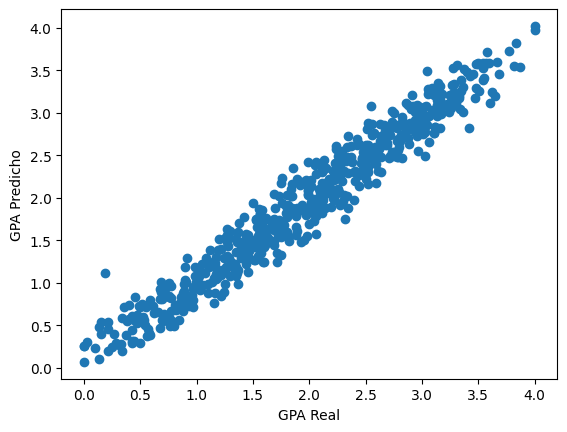

In [70]:
# graficar la predicción vs el valor real

plt.scatter(y_test, y_pred)
plt.xlabel('GPA Real')
plt.ylabel('GPA Predicho')
plt.show()

